<a href="https://colab.research.google.com/github/NavidHeydari/MLWithTensorFlow/blob/main/Digging_with_TenserFlow_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing the requiered tools

In [20]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


#loading sample data MNIST
## download from MNIST
## load the data into dataset object

In [21]:
mnist = tf.keras.datasets.mnist
mnistData = mnist.load_data();

#Spliting test and train datasets

In [22]:
(X_train,y_train),(X_test,y_test) = mnistData

#PreProcessing Step:
##Visualization of the sample data

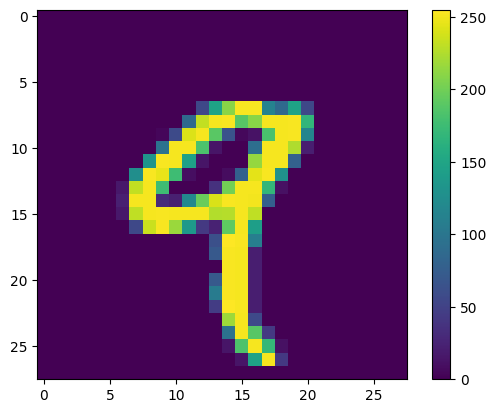

In [23]:
plt.figure() #defining a figure obj
plt.imshow(X_train[4]) #show the 4th object in that collection
plt.colorbar() # show the color bars close to the pic
plt.show() #paint the pic in the output


## Prepare the Data for processing -- Scaling from 256 image into a [0-1 range]

In [24]:
X_train,X_test = X_train/255.0, X_test/255.0

## Creat NN --> define our Model

In [25]:
# Creating the model -- using Keras Sequentilal since that's the numerical categorical numbers in the data dataset
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)), # flattening the input shape data so it can get fed into the fist layer
        tf.keras.layers.Dense(512, activation='relu'), # numbers are in the range of 512 categories --> I thoughr we scaled them down into 0-9??
        tf.keras.layers.Dropout(0.2), # prevent overfitting --> randomly set input to 0s --> using the rate 20%
        tf.keras.layers.Dense(10, activation='softmax') # the output range will include only 10 categories == numbers in range 0 up to 9 | softmax for categorical data
    ]
)

## Compile the model

In [26]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Training Steps: train the model with the data -- fit method

In [27]:
model.fit(X_train,y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.7020 - accuracy: 0.8222 - val_loss: 0.3645 - val_accuracy: 0.9021
Epoch 2/5
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3710 - accuracy: 0.8976 - val_loss: 0.2967 - val_accuracy: 0.9194
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3138 - accuracy: 0.9113 - val_loss: 0.2615 - val_accuracy: 0.9261
Epoch 4/5
1500/1500 [==============================] - 16s 10ms/step - loss: 0.2783 - accuracy: 0.9217 - val_loss: 0.2375 - val_accuracy: 0.9316
Epoch 5/5
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2523 - accuracy: 0.9298 - val_loss: 0.2191 - val_accuracy: 0.9381


## Evaluation Steps of the model

In [28]:
test_loss,test_accuracy = model.evaluate(X_test,y_test)
print("test accuracy:", test_accuracy)
print('test loss:', test_loss)

313/313 [==============================] - 3s 8ms/step - loss: 0.2202 - accuracy: 0.9395
test accuracy: 0.9394999742507935
test loss: 0.22020256519317627


#Verification of the model
## Verifiying the Result of Trained Model on the randomly selected image

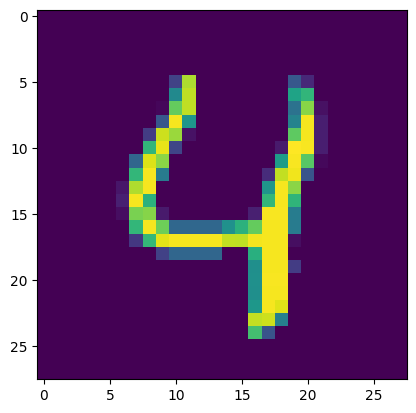

In [31]:
single_test_img = X_test[4]
single_test_img = np.array(single_test_img,dtype='float')
plt.imshow(single_test_img)
plt.show()

## predicting above item via our model to make a sense of the data


In [32]:
single_test_img = (np.expand_dims(single_test_img,0))
pred = model.predict(single_test_img)
actual_predicted_number_from_image = np.argmax(pred[0])
print(pred)
print('----------')
print('actual predicted value via our model:', actual_predicted_number_from_image)

1/1 [==============================] - 0s 25ms/step
[[8.9742069e-04 6.7613561e-05 5.7515171e-03 3.3202322e-04 9.1884226e-01
  1.3554862e-03 5.7868781e-03 6.7554847e-03 5.8535812e-03 5.4357812e-02]]
----------
actual predicted value via our model: 4


# Save the Model

In [33]:
model.save('picture_prediction_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
